In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.stats import stattools
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='', output_format='pandas')

In [2]:
data, meta_data = ts.get_intraday('VTI', outputsize="full")

In [3]:
data.columns = ['open', 'high', 'low', 'close', 'volume']
data

,open,high,low,close,volume
date,,,,,
2019-06-20 09:45:00,150.7300,150.8500,150.5500,150.5800,255430.0
2019-06-20 10:00:00,150.6400,150.7900,150.5100,150.6300,162331.0
2019-06-20 10:15:00,150.6400,150.7900,150.5800,150.6101,178006.0
2019-06-20 10:30:00,150.6500,150.6900,150.3500,150.3800,104179.0
2019-06-20 10:45:00,150.4350,150.4499,150.2501,150.3500,95756.0
2019-06-20 11:00:00,150.3500,150.4090,150.1400,150.1400,70223.0
2019-06-20 11:15:00,150.1704,150.2887,150.1300,150.1300,70517.0
2019-06-20 11:30:00,150.1200,150.1200,149.9900,149.9934,77735.0
2019-06-20 11:45:00,150.0499,150.0900,149.9500,150.0800,64463.0


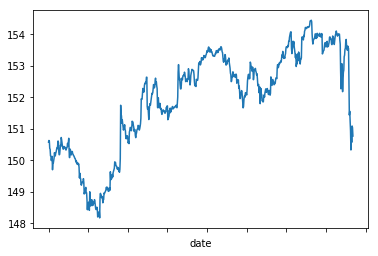

In [4]:
data.close.plot()

2.3021814856757686e-06 0.0011500956497877178


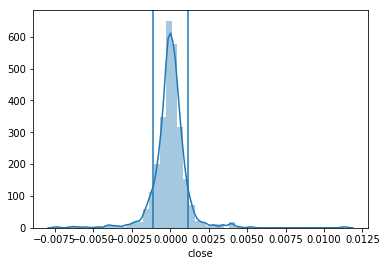

In [5]:
rets = data.close.pct_change()[1:]
sns.distplot(rets)
plt.axvline(x=(rets.mean() + rets.std()))
plt.axvline(x=(rets.mean() - rets.std()))
print(rets.mean(), rets.std())

In [6]:
jb, p, sk, ku = stattools.jarque_bera(rets)
print(p < 0.05)

True


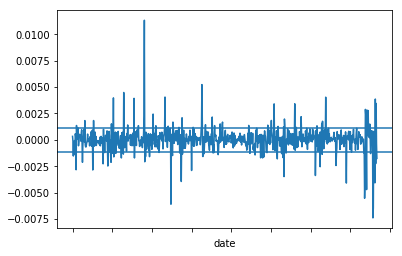

In [7]:
rets.plot()
plt.axhline(y=(rets.mean() + rets.std()))
plt.axhline(y=(rets.mean() - rets.std()))

Text(0.5, 1.0, 'Moving Averages')

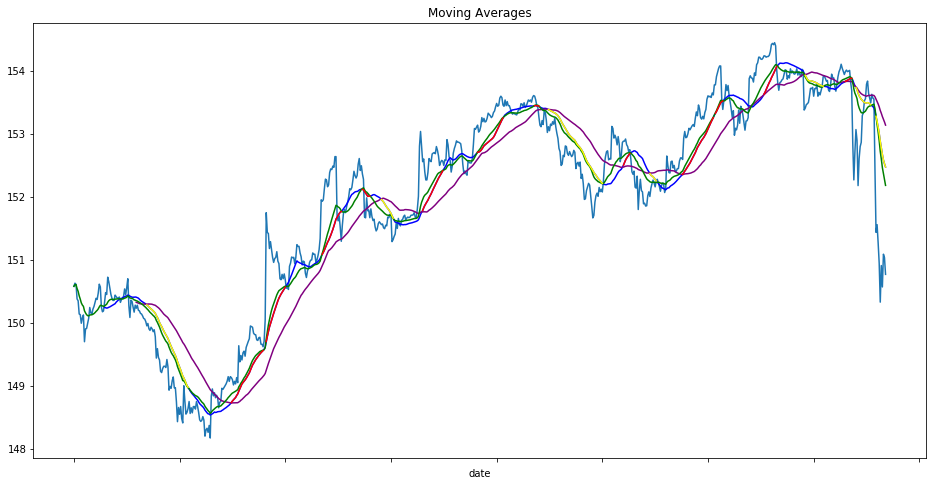

In [8]:
data.close.plot(figsize=(16,8))
ma30 = data.close.rolling(30).mean() # blue
ma60 = data.close.rolling(60).mean() # purple
ewm = data.close.ewm(alpha=1/15).mean() # green
ma30.plot(c='blue')
ma60.plot(c='purple')
ewm.plot(c='green')
ma30[(ewm > ma30) & (ma30 > ma60)].reindex_like(ewm).plot(c='red')
ma30[(ewm < ma30) & (ma30 < ma60)].reindex_like(ewm).plot(c='yellow')
plt.title('Moving Averages')

Text(0.5, 1.0, 'Internal Bar Range')

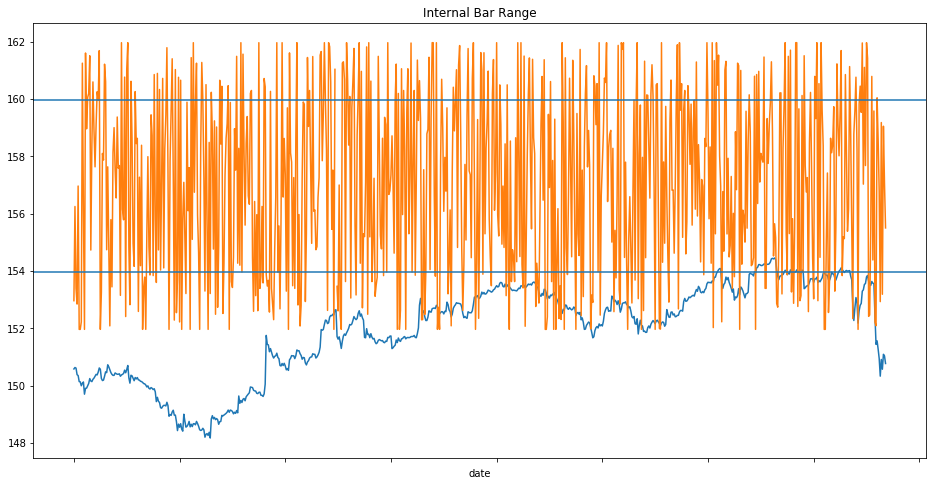

In [10]:
data.close.plot(figsize=(16,8))
ibr = (data.close - data.low) / (data.high - data.low)
(ibr*10 + data.close.mean()).plot()
plt.axhline(y=(data.close.mean() + 8))
plt.axhline(y=(data.close.mean() + 2))
plt.title('Internal Bar Range')

Text(0.5, 1.0, 'Bollinger Bands')

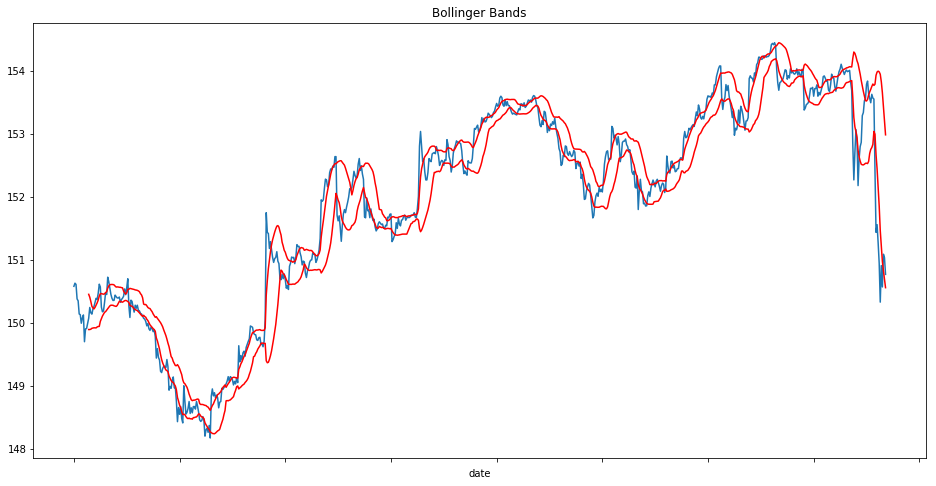

In [11]:
data.close.plot(figsize=(16,8))
ravg = data.close.rolling(15).mean()
rstd = data.close.rolling(15).std()
(ravg + rstd).plot(c='r')
(ravg - rstd).plot(c='r')
plt.title('Bollinger Bands')

In [18]:
def rs1(x):
    u = np.array([i for i in x if i > 0])
    d = np.array([j for j in x if j < 0]) 
    return 100 - 100 / (1+ np.abs(u.mean() / d.mean())), np.abs(u.mean()), np.abs(d.mean())

def rs(x, pu, pd):
    cu = np.array([i for i in x if i > 0])
    cd = np.array([j for j in x if j < 0]) 
    u = (pu * 13 + np.abs(cu.mean())) / 14
    d = (pd * 13 + np.abs(cd.mean())) / 14
    return 100 - 100 / (1 + u/d), u, d

In [19]:
rsi = np.zeros(780)
rx, ux, dx = rs1(rets[:14])
rsi[14] = rx
for i in range(15, 780):
    rx, ux, dx = rs(rets[i-14:i], ux, dx)
    rsi[i] = rx
rsi[0:14] = np.nan

rsi

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 34.39356468,
       34.74052739, 34.96155951, 35.48294184, 35.7435679 , 36.0060055 ,
       35.85677315, 35.57610863, 35.74028377, 35.99707592, 37.42541806,
       38.60764451, 39.22513693, 39.88826348, 40.34545871, 40.6919957 ,
       41.16186234, 41.58218525, 42.41090754, 43.41178336, 44.47237239,
       45.62421827, 46.58997821, 47.72285653, 48.27326896, 48.58850297,
       49.49239457, 50.47341031, 51.73455347, 52.5242211 , 53.01186316,
       53.24448978, 52.57548984, 51.92298035, 51.64536735, 51.40093388,
       51.38135319, 51.47598847, 50.05591399, 48.55109152, 47.31957682,
       46.25368999, 45.53515053, 45.30520014, 44.95932506, 45.06154087,
       45.22527068, 45.76004806, 46.50800556, 47.27261681, 48.2293062 ,
       49.22281198, 50.72070662, 52.40221175, 52.95323302, 53.42

Text(0.5, 1.0, 'Relative Strength Index')

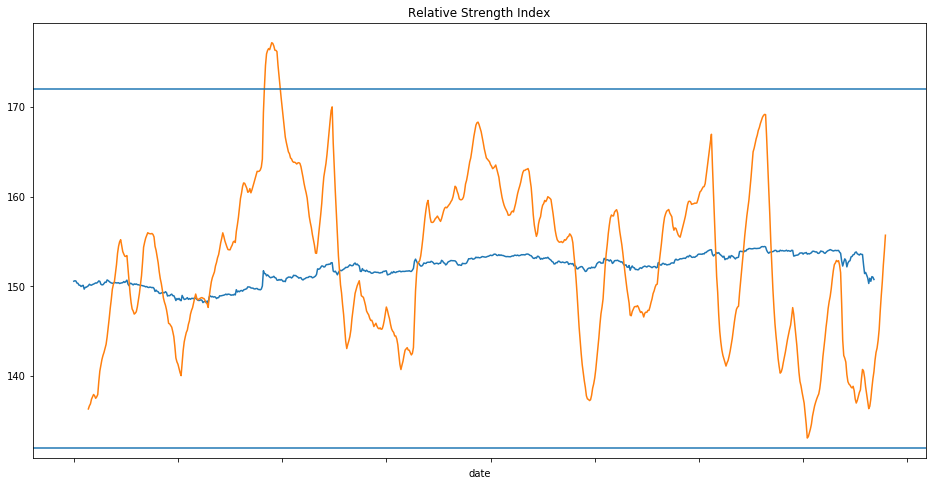

In [20]:
data.close.plot(figsize=(16,8))
plt.plot(data.close.mean() - 50 + rsi)
plt.axhline(data.close.mean() - 50 + 70)
plt.axhline(data.close.mean() - 50 + 30)
plt.title('Relative Strength Index')

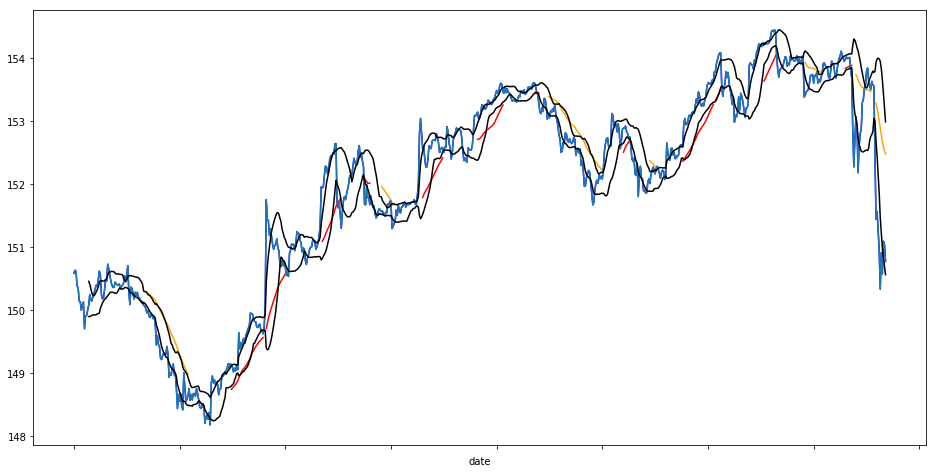

In [17]:
data.close.plot(figsize=(16,8), c='b')
ma30 = data.close.rolling(30).mean() # blue
ma60 = data.close.rolling(60).mean() # purple
ewm = data.close.ewm(alpha=1/15).mean() # green
#ma30.plot(c='blue')
#ma60.plot(c='purple')
#ewm.plot(c='green')
ma30[(ewm > ma30) & (ma30 > ma60)].reindex_like(ewm).plot(c='red')
ma30[(ewm < ma30) & (ma30 < ma60)].reindex_like(ewm).plot(c='orange')

data.close.plot(figsize=(16,8))
ravg = data.close.rolling(15).mean()
rstd = data.close.rolling(15).std()
(ravg + rstd).plot(c='black')
(ravg - rstd).plot(c='black')
